In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import datetime
from dateutil import parser
import matplotlib.dates as mdates
import matplotlib.ticker as plticker

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#np.set_printoptions(threshold=np.inf)

C:\Users\lenovo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lenovo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\lenovo\Anaconda3\lib\site-packages\tensorflow\python\framew

# Load the dataset

In [2]:
org_df = pd.read_csv('D:/code/code_CIS/predicting_bitcoin_market-master/crypto_data_news_reddit_final.csv',index_col=0)

In [3]:
org_df

open_BTCUSDT  high_BTCUSDT  low_BTCUSDT  close_BTCUSDT  \
timestamp                                                                     
2018-01-01 00:00:00      13820.26      13820.26     13498.05       13557.88   
2018-01-01 01:00:00      13557.88      13585.66     13250.50       13262.85   
2018-01-01 02:00:00      13262.85      13400.00     13186.02       13320.00   
2018-01-01 03:00:00      13320.00      13515.44     13308.54       13372.00   
2018-01-01 04:00:00      13372.00      13499.83     13279.50       13483.06   
2018-01-01 05:00:00      13483.06      13483.07     13256.90       13416.60   
2018-01-01 06:00:00      13416.60      13750.00     13200.00       13735.01   
2018-01-01 07:00:00      13735.01      13824.23     13500.00       13534.18   
2018-01-01 08:00:00      13534.18      13590.00     13350.00       13399.99   
2018-01-01 09:00:00      13399.99      13559.48     13374.10       13538.00   
2018-01-01 10:00:00      13538.00      13538.00     13350.21       13454.30   
2018-01-01 11:00:00      13454.30      13476.65     13051.06       13157.21   
2018-01-01 12:00:00      13157.21      13261.14     13092.30       13147.64   
2018-01-01 13:00:00      13147.64      13151.66     12900.00       12994.80   
2018-01-01 14:00:00      12994.80      13202.20     12800.00       13174.71   
2018-01-01 15:00:00      13174.71      13350.00     13136.73       13199.67   
2018-01-01 16:00:00      13199.67      13206.68     12946.03       13000.01   
2018-01-01 17:00:00      13000.01      13157.54     13000.01       13000.70   
2018-01-01 18:00:00      13000.70      13249.78     12986.90       13075.15   
2018-01-01 19:00:00      13075.15      13250.00     13066.26       13244.15   
2018-01-01 20:00:00      13244.15      13481.00     13244.15       13403.05   
2018-01-01 21:00:00      13403.05      13653.95     13398.16       13515.37   
2018-01-01 22:00:00      13515.37      13600.79     13418.75       13418.75   
2018-01-01 23:00:00      13418.75      13418.75     13255.02       13338.41   
2018-01-02 00:00:00      13338.41      13860.90     13338.40       13694.98   
2018-01-02 01:00:00      13694.98      13746.57     13530.32       13607.10   
2018-01-02 02:00:00      13607.10      13666.77     13120.01       13274.90   
2018-01-02 03:00:00      13274.90      13274.91     13032.87       13048.56   
2018-01-02 04:00:00      13048.56      13195.39     12851.00       12988.17   
2018-01-02 05:00:00      12988.17      13100.17     12988.17       13053.32   
...                           ...           ...          ...            ...   
2019-11-19 18:00:00       8101.94       8121.47      8096.00        8096.00   
2019-11-19 19:00:00       8096.00       8123.64      8096.00        8107.43   
2019-11-19 20:00:00       8109.86       8114.47      8084.69        8110.98   
2019-11-19 21:00:00       8120.57       8125.24      8105.40        8118.43   
2019-11-19 22:00:00       8128.34       8165.58      8122.51        8137.20   
2019-11-19 23:00:00       8143.85       8152.12      8118.96        8133.77   
2019-11-20 00:00:00       8134.49       8134.49      8098.43        8128.63   
2019-11-20 01:00:00       8128.63       8148.82      8118.68        8127.87   
2019-11-20 02:00:00       8133.20       8154.69      8133.20        8143.96   
2019-11-20 03:00:00       8142.78       8142.78      8126.05        8127.14   
2019-11-20 04:00:00       8128.16       8146.15      8101.97        8101.97   
2019-11-20 05:00:00       8104.98       8116.40      8082.82        8111.17   
2019-11-20 06:00:00       8124.19       8138.75      8109.41        8118.95   
2019-11-20 07:00:00       8130.39       8138.20      8118.23        8122.44   
2019-11-20 08:00:00       8122.44       8130.93      8083.11        8094.32   
2019-11-20 09:00:00       8092.83       8099.90      8064.62        8082.86   
2019-11-20 10:00:00       8070.59       8080.16      8046.64        8063.04   
2019-11-20 11:00:00       8056.16       8099.92      8056.16        808

In [30]:
org_df.columns

Index(['open_BTCUSDT', 'high_BTCUSDT', 'low_BTCUSDT', 'close_BTCUSDT',
       'volume_BTCUSDT', 'close_LTCUSD', 'volume_LTCUSD', 'close_ETHUSD',
       'volume_ETHUSD', 'gnews_flair', 'gnews_tb_polarity',
       'gnews_tb_subjectivity', 'gnews_sid_pos', 'gnews_sid_neg',
       'gnews_sid_neu', 'gnews_sid_com', 'reddit_flair', 'reddit_tb_polarity',
       'reddit_tb_subjectivity', 'reddit_sid_pos', 'reddit_sid_neg',
       'reddit_sid_neu', 'reddit_sid_com'],
      dtype='object')

# Features engineering

In [31]:
org_df['flair'] = org_df['gnews_flair'] + org_df['reddit_flair']
org_df['tb_polarity'] = org_df['gnews_tb_polarity'] + org_df['reddit_tb_polarity']
org_df['tb_subjectivity'] = org_df['gnews_tb_subjectivity'] + org_df['reddit_tb_subjectivity']
org_df['sid_pos'] = org_df['gnews_sid_pos'] + org_df['reddit_sid_pos']
org_df['sid_neg'] = org_df['gnews_sid_neg'] + org_df['reddit_sid_neg']
org_df = org_df[['close_BTCUSDT', 'volume_BTCUSDT', 'close_LTCUSD', 'volume_LTCUSD', 'close_ETHUSD', 'volume_ETHUSD', 'flair', 'tb_polarity', 'tb_subjectivity', 'sid_pos', 'sid_neg']]

In [32]:
org_df

close_BTCUSDT  volume_BTCUSDT  close_LTCUSD  \
timestamp                                                          
2018-01-01 00:00:00       13557.88      210.213142        222.24   
2018-01-01 01:00:00       13262.85      191.931776        215.20   
2018-01-01 02:00:00       13320.00      169.456410        215.36   
2018-01-01 03:00:00       13372.00       80.455327        219.30   
2018-01-01 04:00:00       13483.06      127.212610        223.72   
...                            ...             ...           ...   
2019-11-20 19:00:00        8086.65        1.910237         54.68   
2019-11-20 20:00:00        8102.66        9.783435         55.06   
2019-11-20 21:00:00        8098.29        1.726209         55.10   
2019-11-20 22:00:00        8091.13        1.683230         54.90   
2019-11-20 23:00:00        8094.38        4.582621         54.92   

                     volume_LTCUSD  close_ETHUSD  volume_ETHUSD     flair  \
timestamp                                                                   
2018-01-01 00:00:00      590.23000        728.77     625.293831  0.042570   
2018-01-01 01:00:00      698.36000        724.27     710.891607 -0.224657   
2018-01-01 02:00:00      464.55000        722.11     849.257651 -0.258211   
2018-01-01 03:00:00      407.81000        733.19     556.397003  0.125107   
2018-01-01 04:00:00      965.39000        738.59    1247.722800  0.486225   
...                            ...           ...            ...       ...   
2019-11-20 19:00:00       26.89869        174.40      22.319940  0.252464   
2019-11-20 20:00:00       21.18500        174.45      25.050680 -0.075611   
2019-11-20 21:00:00       16.47622        175.48      32.281160  0.111770   
2019-11-20 22:00:00       35.17709        174.72       5.926510  0.921115   
2019-11-20 23:00:00       12.87105        174.33      16.345070  0.113121   

                     tb_polarity  tb_subjectivity   sid_pos   sid_neg  
timestamp                                                              
2018-01-01 00:00:00     0.067753         0.323211  0.065111  0.025222  
2018-01-01 01:00:00     0.113953         0.581122  0.170736  0.117097  
2018-01-01 02:00:00    -0.009463         0.596365  0.097111  0.044556  
2018-01-01 03:00:00     0.310221         0.727627  0.221397  0.050222  
2018-01-01 04:00:00     0.303071         0.644640  0.218254  0.030365  
...                          ...              ...       ...       ...  
2019-11-20 19:00:00     0.230229         0.928645  0.200984  0.094968  
2019-11-20 20:00:00     0.462598         0.922367  0.405056  0.045111  
2019-11-20 21:00:00     0.009821         0.566811  0.090556  0.202611  
2019-11-20 22:00:00     0.137598         0.614033  0.342556  0.045111  
2019-11-20 23:00:00     0.117494         0.569380  0.132556  0.080444  

[16536 rows x 11 columns]

# Dataset scalling

In [4]:
dataset = org_df.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
#print('dataset.shape', dataset.shape)
num_of_features = len(org_df.columns)
print('Number of features', num_of_features)

Number of features 23


# Configuration

In [5]:
expr_name = 'expr_1'
look_back = 24*60 # 60 days, as each entry is for 1 hour
lstm_layers = 32
epochs=5
batch_size=128

# spliting datasets into train and test

In [6]:
train_size_percent = 0.80
pred_col = org_df.columns.get_loc('close_BTCUSDT')

# function to split the data
def create_dataset(dataset, pred_col, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), :]
    dataX.append(a)
    dataY.append(dataset[i + look_back, pred_col])
  return np.array(dataX), np.array(dataY)


train_size = int(len(dataset) * train_size_percent)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

trainX, trainY = create_dataset(train, pred_col, look_back=look_back)
testX, testY = create_dataset(test, pred_col, look_back=look_back)
# reshape input to be  [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_of_features))
testX = np.reshape(testX, (testX.shape[0],look_back, num_of_features))

print('Training dataset length ', len(train))
print('Testing dataset length ', len(test))
print('look_back ', look_back)

Training dataset length  13228
Testing dataset length  3308
look_back  1440


# Build the model and train

In [7]:
# create and fit the LSTM network

model = Sequential()
model.add(LSTM(lstm_layers, input_shape=(look_back,num_of_features)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history= model.fit(trainX, trainY,validation_split=0.30, epochs=epochs, batch_size=batch_size,shuffle=False)

Train on 8250 samples, validate on 3537 samples
Epoch 1/5
8250/8250 [==============================] - 132s 16ms/step - loss: 0.0406 - val_loss: 0.0458
Epoch 2/5
8250/8250 [==============================] - 100s 12ms/step - loss: 0.0080 - val_loss: 0.0225
Epoch 3/5
8250/8250 [==============================] - 104s 13ms/step - loss: 0.0028 - val_loss: 0.0114
Epoch 4/5
8250/8250 [==============================] - 109s 13ms/step - loss: 0.0014 - val_loss: 0.0086
Epoch 5/5
8250/8250 [==============================] - 109s 13ms/step - loss: 0.0011 - val_loss: 0.0070


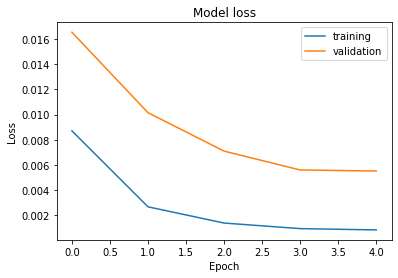

In [37]:
# Plot training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [38]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Get something which has as many features as dataset
trainPredict_extended = np.zeros((len(trainPredict),num_of_features))
# Put the predictions there
trainPredict_extended[:,pred_col] = trainPredict[:,0]
# Inverse transform it and select the 3rd column.
trainPredict = scaler.inverse_transform(trainPredict_extended) [:,pred_col]

# Get something which has as many features as dataset
testPredict_extended = np.zeros((len(testPredict),num_of_features))
# Put the predictions there
testPredict_extended[:,pred_col] = testPredict[:,0]
# Inverse transform it and select the pred_col column.
testPredict = scaler.inverse_transform(testPredict_extended)[:,pred_col] 

trainY_extended = np.zeros((len(trainY),num_of_features))
trainY_extended[:,pred_col]=trainY
trainY = scaler.inverse_transform(trainY_extended)[:,pred_col]

testY_extended = np.zeros((len(testY),num_of_features))
testY_extended[:,pred_col]=testY
testY = scaler.inverse_transform(testY_extended)[:,pred_col]

# calculate root mean squared error
trainScore_RMSE = math.sqrt(mean_squared_error(trainY, trainPredict))
testScore_RMSE = math.sqrt(mean_squared_error(testY, testPredict))

# calculate absolute mean error
trainScore_MAE = np.sum(np.absolute(trainY - trainPredict))/len(trainY)
testScore_MAE = np.sum(np.absolute(testY - testPredict))/len(testY)

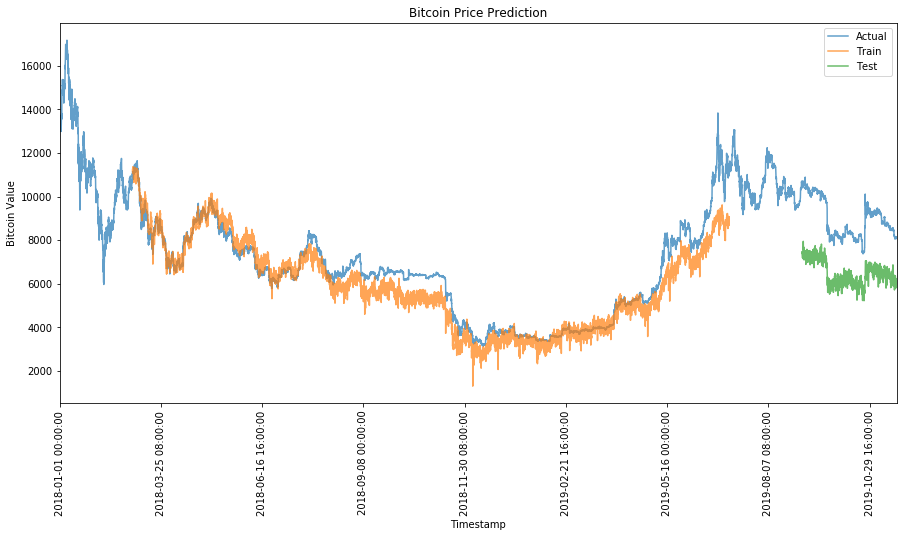

In [39]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, pred_col] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, pred_col] = testPredict

# contruct pandas dataframe for plotting
time_df = pd.DataFrame(org_df.index)
time_df['Actual'] = scaler.inverse_transform(dataset)[:,pred_col]
df1 = pd.DataFrame(trainPredictPlot[:,pred_col],columns=['Train'])
df2 = pd.DataFrame(testPredictPlot[:,pred_col],columns=['Test'])
time_df2 = pd.concat([time_df, df1, df2], axis=1, sort=False)
time_df2.set_index('timestamp',inplace=True)

# plot the output
fig, ax = plt.subplots(figsize=(15,7))
time_df2.plot(ax=ax,rot=90,alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Value')
plt.title('Bitcoin Price Prediction')
plt.savefig(expr_name + '.png',bbox_inches = "tight")

In [40]:
print('-' * 50)
print('Experiment name:', expr_name)

print('-' * 50)
print('look_back days:', look_back/24)
print('lstm_layers:', lstm_layers)
print('epochs:', epochs)
print('batch_size:', batch_size)
print('dataset features', list(org_df.columns))


print('-' * 50)
print('Train Score: %.2f RMSE' % (trainScore_RMSE))
print('Test Score: %.2f RMSE' % (testScore_RMSE))

print('-' * 50)
print('Train Score: %.2f MAE' % (trainScore_MAE))
print('Test Score: %.2f MAE' % (testScore_MAE))

print('-' * 50)
print('Model summary:')
model.summary()

--------------------------------------------------
Experiment name: expr_1
--------------------------------------------------
look_back days: 60.0
lstm_layers: 32
epochs: 5
batch_size: 128
dataset features ['close_BTCUSDT', 'volume_BTCUSDT', 'close_LTCUSD', 'volume_LTCUSD', 'close_ETHUSD', 'volume_ETHUSD', 'flair', 'tb_polarity', 'tb_subjectivity', 'sid_pos', 'sid_neg']
--------------------------------------------------
Train Score: 769.11 RMSE
Test Score: 2490.39 RMSE
--------------------------------------------------
Train Score: 572.49 MAE
Test Score: 2454.61 MAE
--------------------------------------------------
Model summary:
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                5632      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total par